In [70]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# Load your yearly time series data into a Pandas DataFrame
data = pd.read_csv('/content/merged_data_gdp_final.csv')
# Sort the DataFrame in ascending order in-place
data.sort_values(by='Year', ascending=True, inplace=True)
data= data.dropna()

In [71]:
# Prepare the data for LSTM input with a custom window size

def create_sequences(data_column, window_length):
    X_sequences = []
    y_sequences = []
    column_data = data_column.to_numpy()

    for i in range(len(column_data) - window_length-1):
        X_sequence = [a for a in column_data[i:i + window_length]]
        y_sequence = column_data[i + window_length]
        X_sequences.append(X_sequence)
        y_sequences.append(y_sequence)

    return np.array(X_sequences), np.array(y_sequences)

In [72]:
# Define the window size for the LSTM model
window_length = 5

# Create input sequences and labels for each column
X_sequences_dict = {}
y_sequences_dict = {}


for column in data.columns[1:]:
    X_column, y_column = create_sequences(data[column], window_length)
    X_sequences_dict[column] = X_column
    y_sequences_dict[column] = y_column


In [73]:
# # Assuming you have a 2-dimensional NumPy array
y = np.array(list(y_sequences_dict.values()))
scaler = MinMaxScaler()

y_normalized = scaler.fit_transform(y)
# # Use the flatten method to create a 1-dimensional array
y_normalized = y_normalized.flatten()

# # Initialize an empty list to store the flattened arrays
flattened_arrays = []

# # Loop through the dictionary and flatten each array based on its key
for key, array in X_sequences_dict.items():

    flattened_array = array.flatten()
    flattened_arrays.append(flattened_array)
    # print(flattened_array)


# # Convert the list of flattened arrays to a 2-dimensional NumPy array
X = np.array(list(X_sequences_dict.values()))
X = np.reshape(X, (-1, 5))
X_normalized = scaler.fit_transform(X)

In [74]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized,
                                                    y_normalized,
                                                    test_size=0.2,
                                                    random_state=42)

In [75]:
from sklearn.neural_network import MLPRegressor

model = Sequential()
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100,),
                             activation='relu',
                             solver='adam',
                             max_iter=1000)
mlp_regressor.fit(X_train, y_train)

MLPRegressor(max_iter=1000)

In [76]:
from sklearn.metrics import mean_squared_error

y_pred = mlp_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.00033988252997693496


In [79]:
# Make predictions for Canada
X_canada, y_canada = create_sequences(data['canada'], window_length)
# X_canada = scaler.transform(X_canada)  # Normalize the input data
X_canada = np.array(X_canada)
X_canada = np.reshape(X_canada, (-1, window_length))  # Reshape the data to match MLP input

y_canada_predicted = mlp_regressor.predict(X_canada)  # Predict using MLPRegressor

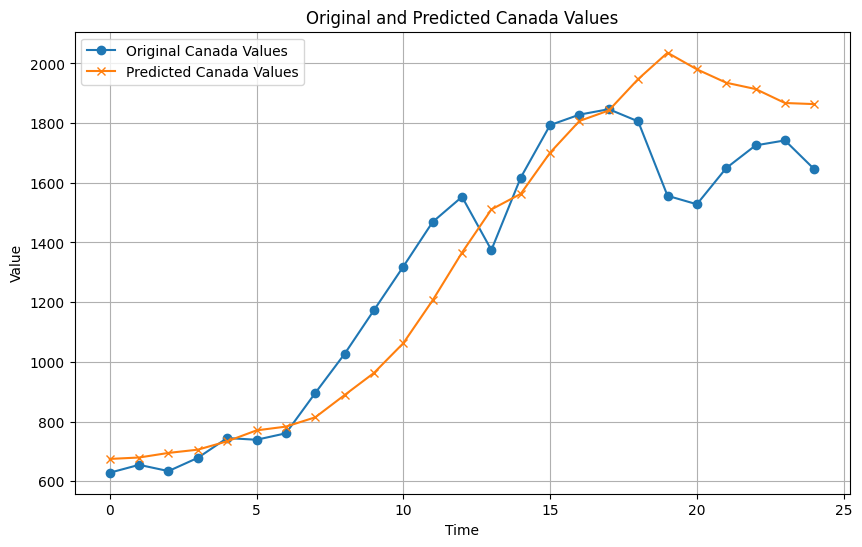

In [80]:
import matplotlib.pyplot as plt

# Assuming you have already performed the steps for predictions and have y_canada and y_canada_predicted available

# Create a range of indices for the plot
indices = np.arange(len(y_canada))

# Plot the original and predicted values
plt.figure(figsize=(10, 6))
plt.plot(indices, y_canada, label='Original Canada Values', marker='o')
plt.plot(indices, y_canada_predicted, label='Predicted Canada Values', marker='x')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Original and Predicted Canada Values')
plt.legend()
plt.grid()
plt.show()
